Installation des bibliothèques

In [ ]:
!pip install tweepy --upgrade
!pip install pandas --upgrade
!pip install openpyxl --upgrade
!pip install textblob --upgrade

Imports des bibliothèques

In [2]:
import tweepy
import pandas as pd
import json
import re
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

API credentials et connection à Twitter

In [3]:
#read credentials
f = open('credentials.json')
data = json.load(f)
f.close()

consumer_key = data["consumer_key"] #Your API/Consumer key 
consumer_secret = data["consumer_secret"] #Your API/Consumer Secret Key
access_token = data["access_token"]    #Your Access token key
access_token_secret = data["access_token_secret"] #Your Access token Secret key

# Connect to twitter API
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)
api = tweepy.API(auth, wait_on_rate_limit=True)

Recherche par mots clés

In [9]:
keywords = 'GPT-3'
no_of_tweets = 10000

Récupération des tweets en prenant compte des mots clés et de la langue

In [12]:
tweets = tweepy.Cursor(api.search_tweets, q = "GPT3 lang:en OR lang:fr", count = no_of_tweets, tweet_mode = 'extended').items(no_of_tweets)

data = []
columns = ['user', 'Tweet', 'likes', 'retweets', 'source', 'created_at']

for tweet in tweets : 
    data.append([tweet.user.screen_name, tweet.full_text, tweet.favorite_count, tweet.retweet_count, tweet.source, tweet.created_at])

df = pd.DataFrame(data, columns = columns)
print(df)

Rate limit reached. Sleeping for: 475


                 user                                              Tweet  \
0            Worrelpa  RT @JussiRoine: 🤖 BLOGGED: A practical look at...   
1     Abdulsalam_muha  RT @csaba_kissi: 🤖 AI Tools to boost your prod...   
2           reddtactt  RT @csaba_kissi: 🤖 AI Tools to boost your prod...   
3           jadine112  RT @VitalikButerin: @ESYudkowsky I actually wo...   
4     jamesaphoenix12  RT @DataChaz: It's not about the size!\n\n"#Ch...   
...               ...                                                ...   
8412        PCosmixki  RT @Shi4Tech: #DidYouKnow that you can use #AI...   
8413     xiaojiahaina  RT @FutureOurWork: Scientists at @MIT_CSAIL ha...   
8414      philly_doug  RT @fraserxu: "Upload a book, ask me anything ...   
8415        AthiLumik  RT @FrRonconi: With the new #AImodels, like #C...   
8416        Haoyu_USC  RT @mbrandolph: A coming wave of disruptive co...   

      likes  retweets               source                created_at  
0         0     

Représentation graphique des j'aimes sur les tweets en lien avec GPT

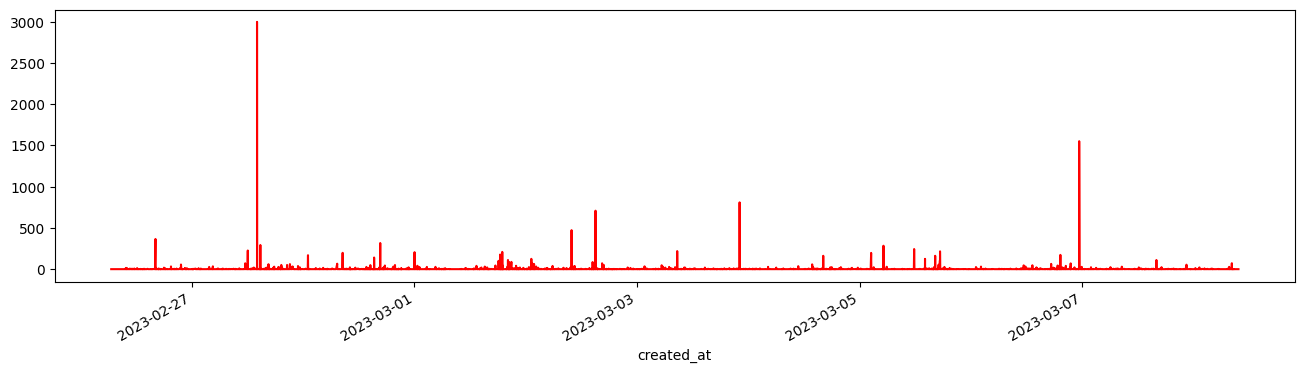

In [14]:
time_likes = pd.Series(data = df['likes'].values, index = df['created_at'])
time_likes.plot(figsize=(16,4), color ='r')
plt.show()

Analyse des sentiments des tweets

In [19]:
#Récupération des textes des tweets
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [20]:
#Analyse des sentiments
def analysis_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))

    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else : 
        return -1

Ajout des données de l'analyses des sentiments au DataFrame

In [22]:
df['sentiment'] = np.array([analysis_sentiment(tweet) for tweet in df['Tweet']])

Export du DataFrame en excel

In [ ]:
print(df)
df.to_excel(r'D:\maxim\Documents\Projects\CollecteDesDonnees\Twitter\UserKeywordsGPT.xlsx', index=False)